<a href="https://colab.research.google.com/github/catherinedxx/am205_g_activities/blob/master/nn_numerics/AM205_2021_NeuralNetworks_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AM205 Fall 2021
## Group activity workshop: Neural networks and their connection to numerical methods
Originally written by Matthieu Meeus (matthieu_meeus@g.harvard.edu), modified by Catherine Ding (xiaoxiaoding@g.harvard.edu).

Outline:
- NN from scratch
- Regression demo
- Little exercise
- Don't reinvent to the wheel: use Pytorch/Tensorflow
- NeuroDiffEq examples
- NeuroDiffEq exercise

References:
- Harvard AM205 course materials
- Harvard AM207 course materials
- MIT 6.036 course materials



In [ ]:
from autograd import numpy as np
from autograd import grad
from autograd.misc.optimizers import adam, sgd
from autograd import scipy as sp
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sys
%matplotlib inline

## 1. Building a gradient descent algorithm

### Exercise 1a. Implementation of a general gradient descent algorithm
We want to find the $x$ that minimizes the value of the *objective
function* $f(x)$, for an arbitrary scalar function $f$.  The function
$f$ will be implemented as a Python function of one argument, that
will be a numpy column vector.  For efficiency, we will work with
Python functions that return not just the value of $f$ at $f(x)$ but
also return the gradient vector at $x$, that is, $\nabla_x f(x)$.

We will now implement a generic gradient descent function, `gd`, that
has the following input arguments:

* `f`: a function whose input is an `x`, a column vector, and
  returns a scalar.
* `df`: a function whose input is an `x`, a column vector, and
  returns a column vector representing the gradient of `f` at `x`.
* `x0`: an initial value of $x$, `x0`, which is a column vector.
* `step_size_fn`: a function that is given the iteration index (an
  integer) and returns a step size.
* `num_steps`: the number of iterations to perform

Our function `gd` returns a tuple:

* x: the value at the final step
* fx: the value of f(x) at the final step

In [ ]:
def gd(f, df, x0, step_size_fn, num_steps):
    # write your code here
    return [x1,f(x1)]

### Exercise 1b. Implementation of numerical gradients

Getting the analytic gradient correct for complicated functions is
tricky.  A very handy method of verifying the analytic gradient or
even substituting for it is to estimate the gradient at a point by
means of *finite differences*.

Assume that we are given a function $f(x)$ that takes a column vector
as its argument and returns a scalar value.  In gradient descent, we
will want to estimate the gradient of $f$ at a particular $x_0.$

The $i^{th}$ component of $\nabla_x f(x_0)$ can be estimated as
$$\frac{f(x_0+\delta^{i}) - f(x_0-\delta^{i})}{2\delta}$$
where $\delta^{i}$ is a column vector whose $i^{th}$ coordinate is
$\delta$, a small constant such as 0.001, and whose other components
are zero.
Note that adding or subtracting $\delta^{i}$ is the same as
incrementing or decrementing the $i^{th}$ component of $x_0$ by
$\delta$, leaving the other components of $x_0$ unchanged.  Using
these results, we can estimate the $i^{th}$ component of the gradient.


**For example**, take $x^(0) = (1,2,3)^T$. The gradient $\nabla_x f(x)$ is a vector of the derivatives of $f(x)$ with respect to each component of $x$, or $\nabla_x f(x) = (\frac{df(x)}{dx_1},\frac{df(x)}{dx_2},\frac{df(x)}{dx_3})^T$.

We can approximate the first component of $\nabla_x f(x)$ as
$$\frac{f((1,2,3)^T+(0.01,0,0)^T) - f((1,2,3)^T-(0.01,0,0)^T)}{2\cdot 0.01}.$$

(We add the transpose so that these are column vectors.)
**This process should be done for each dimension independently,
and together the results of each computation are compiled to give the
estimated gradient, which is $d$ dimensional.**

Implement this as a function `make_num_grad_fn` that takes as arguments the
objective function `f` and a value of `delta`, and returns a new
**function** that takes an `x` (a column vector of parameters) and
returns a gradient column vector.

**Note:** Watch  out for aliasing. If you do temp_x = x where x is a vector (numpy array), then temp_x is just another name for the same vector as x and changing an entry in one will change an entry in the other. You should either use x.copy() or remember to change entries back after modification.

In [ ]:
def make_num_grad_fn(f, delta=0.001):
    def df(x):
      # write your code here
      return dfv
    return df

### Exercise 1c. Using the numerical gradient
Recall that our generic gradient descent function takes both a function
`f` that returns the value of our function at a given point, and `df`,
a function that returns a gradient at a given point.  Write a function
`minimize` that takes only a function `f` and uses this function and
numerical gradient descent to return the local minimum.  
You may use the default of `delta=0.001` for `make_num_grad_fn`.

**Hint:** Your definition of `minimize` should call `make_num_grad_fn` exactly
once to return a function. Then you may call this function many times in your updates for numerical gradient descent.
You should return the same outputs as `gd`.

In [ ]:
def minimize(f, x0, step_size_fn, num_steps):
  # write your code here
  return # write your code here

In [ ]:
# supplementary function to convert input list to column vector
def cv(value_list):
  return np.vstack((value_list))

# test cases
def f1(x):
    return float((2 * x + 3)**2)

def df1(x):
    return 2 * 2 * (2 * x + 3)

def f2(v):
    x = float(v[0]); y = float(v[1])
    return (x - 2.) * (x - 3.) * (x + 3.) * (x + 1.) + (x + y -1)**2

def df2(v):
    x = float(v[0]); y = float(v[1])
    return cv([(-3. + x) * (-2. + x) * (1. + x) + \
               (-3. + x) * (-2. + x) * (3. + x) + \
               (-3. + x) * (1. + x) * (3. + x) + \
               (-2. + x) * (1. + x) * (3. + x) + \
               2 * (-1. + x + y),
               2 * (-1. + x + y)])

In [ ]:
# test case on f1
[x1],fx1 = minimize(f1, cv([0.]), lambda i: 0.1, 1000)
print([x1],fx1)

[array([-1.5])] 0.0


Text(0, 0.5, 'Y')

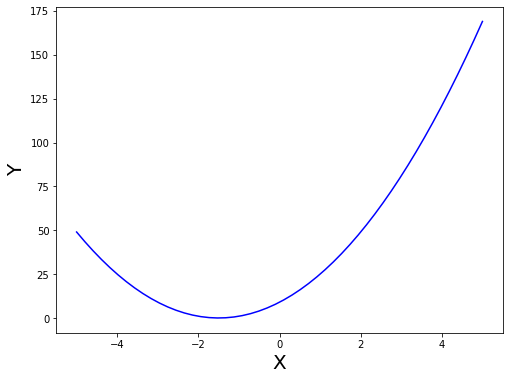

In [ ]:
# visualize the function
x = np.linspace(-5, 5, 50)
y = [f1(i) for i in x]

plt.figure(figsize = (8,6))
plt.plot(x,y,'-b')
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)

In [ ]:
# test case on f2
[x2,y2],fx2 = minimize(f2, cv([0., 0.]), lambda i: 0.01, 1000)
print([x2,y2],fx2)

[array([-2.20582371]), array([3.20582369])] -20.967239611347775


Text(0, 0.5, 'Y')

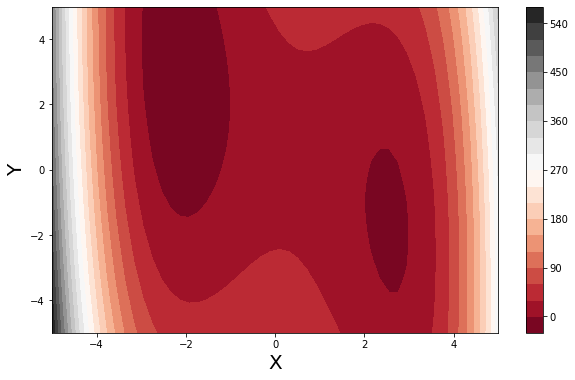

In [ ]:
# visualize the field
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X,Y = np.meshgrid(x,y)
Z = (X - 2.) * (X - 3.) * (X + 3.) * (X + 1.) + (X + Y -1)**2

plt.figure(figsize = (10,6))
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)

## 2. Polynomial interpolation vs NN

Recall the first classes of AM205 and HW1. We covered data interpolation and function approximation. 

In particular, consider linear least squares. We'll generate two toy, noisy datasets:
- One where the true relationship between x and y is linear, with white noise. 
- One where the true between x and y is rather complex. 

For both cases, play around with linear-least squares fitting and neural networks. Discuss the results. What are some pros and cons about each method? In what kind of settings do you want to use which method?


In [ ]:
# no need to reinvent the wheel: use sklearn
# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

Text(0.5, 1.0, 'Training data for simple function')

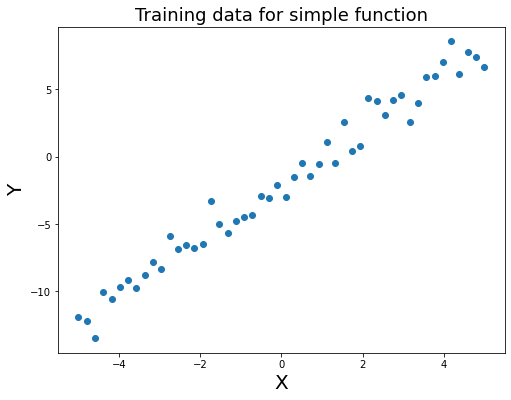

In [ ]:
# toy data 1: true relationship is linear
x_train = np.linspace(-5, 5, 50)
y_train = 2*x_train - 2 + np.random.normal(loc = 0.0, scale = 1, size = len(x_train))

plt.figure(figsize = (8,6))
plt.scatter(x_train, y_train)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.title('Training data for simple function', fontsize = 18)

The coefficient is:  [2.04018226]
The intercept is :  -2.0015061228881796


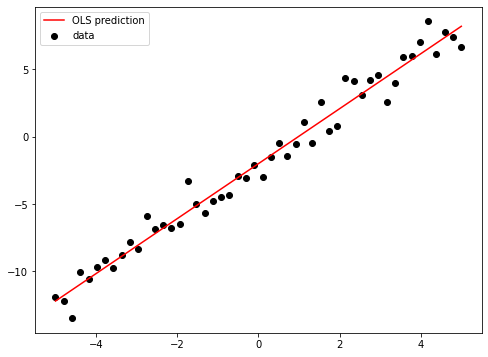

In [ ]:
# apply linear regression
reg = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
print('The coefficient is: ', reg.coef_)
print('The intercept is : ', reg.intercept_)
x_test = np.linspace(-5, 5, 100)
y_test_pred = reg.predict(x_test.reshape(-1, 1))

# visualize Ordinary least squares prediction
plt.figure(figsize = (8,6))
plt.scatter(x_train.flatten(), y_train.flatten(), color='black', label='data')
plt.plot(x_test.flatten(), y_test_pred.flatten(), color='red', label='OLS prediction')
plt.legend(loc='best')
plt.show()

In [ ]:
# build a neural network
class Feedforward:
    def __init__(self, architecture, random=None, weights=None):
        self.params = {'H': architecture['width'],
                       'L': architecture['hidden_layers'],
                       'D_in': architecture['input_dim'],
                       'D_out': architecture['output_dim'],
                       'activation_type': architecture['activation_fn_type'],
                       'activation_params': architecture['activation_fn_params']}

        self.D = (  (architecture['input_dim'] * architecture['width'] + architecture['width'])
                  + (architecture['output_dim'] * architecture['width'] + architecture['output_dim'])
                  + (architecture['hidden_layers'] - 1) * (architecture['width']**2 + architecture['width'])
                 )

        if random is not None:
            self.random = random
        else:
            self.random = np.random.RandomState(0)

        self.h = architecture['activation_fn']

        if weights is None:
            self.weights = self.random.normal(0, 1, size=(1, self.D))
        else:
            self.weights = weights

        self.objective_trace = np.empty((1, 1))
        self.weight_trace = np.empty((1, self.D))


    def forward(self, weights, x):
        ''' Forward pass given weights and input '''
        H = self.params['H']
        D_in = self.params['D_in']
        D_out = self.params['D_out']

        assert weights.shape[1] == self.D

        if len(x.shape) == 2:
            assert x.shape[0] == D_in
            x = x.reshape((1, D_in, -1))
        else:
            assert x.shape[1] == D_in

        weights = weights.T

        # input to first hidden layer
        W = weights[:H * D_in].T.reshape((-1, H, D_in))
        b = weights[H * D_in:H * D_in + H].T.reshape((-1, H, 1))
        input = self.h(np.matmul(W, x) + b)
        index = H * D_in + H

        assert input.shape[1] == H

        # additional hidden layers
        for _ in range(self.params['L'] - 1):
            before = index
            W = weights[index:index + H * H].T.reshape((-1, H, H))
            index += H * H
            b = weights[index:index + H].T.reshape((-1, H, 1))
            index += H
            output = np.matmul(W, input) + b
            input = self.h(output)

            assert input.shape[1] == H

        # output layer
        W = weights[index:index + H * D_out].T.reshape((-1, D_out, H))
        b = weights[index + H * D_out:].T.reshape((-1, D_out, 1))
        output = np.matmul(W, input) + b
        assert output.shape[1] == self.params['D_out']

        return output

    def make_objective(self, x_train, y_train, reg_param):

        def objective(W, t):
            squared_error = np.linalg.norm(y_train - self.forward(W, x_train), axis=1)**2
            if reg_param is None:
                sum_error = np.sum(squared_error)
                return sum_error
            else:
                mean_error = np.mean(squared_error) + reg_param * np.linalg.norm(W)
                return mean_error

        return objective, grad(objective)

    def fit(self, x_train, y_train, params, reg_param=None):

        assert x_train.shape[0] == self.params['D_in']
        assert y_train.shape[0] == self.params['D_out']

        ### make objective function for training
        self.objective, self.gradient = self.make_objective(x_train, y_train, reg_param)

        ### set up optimization
        step_size = 0.01
        max_iteration = 5000
        check_point = 100
        weights_init = self.weights.reshape((1, -1))
        mass = None
        optimizer = 'adam'
        random_restarts = 5

        if 'step_size' in params.keys():
            step_size = params['step_size']
        if 'max_iteration' in params.keys():
            max_iteration = params['max_iteration']
        if 'check_point' in params.keys():
            self.check_point = params['check_point']
        if 'init' in params.keys():
            weights_init = params['init']
        if 'call_back' in params.keys():
            call_back = params['call_back']
        if 'mass' in params.keys():
            mass = params['mass']
        if 'optimizer' in params.keys():
            optimizer = params['optimizer']
        if 'random_restarts' in params.keys():
            random_restarts = params['random_restarts']

        def call_back(weights, iteration, g):
            ''' Actions per optimization step '''
            objective = self.objective(weights, iteration)
            self.objective_trace = np.vstack((self.objective_trace, objective))
            self.weight_trace = np.vstack((self.weight_trace, weights))
            if iteration % check_point == 0:
                print("Iteration {} lower bound {}; gradient mag: {}".format(iteration, objective, np.linalg.norm(self.gradient(weights, iteration))))

        ### train with random restarts
        optimal_obj = 1e16
        optimal_weights = self.weights

        for i in range(random_restarts):
            if optimizer == 'adam':
                adam(self.gradient, weights_init, step_size=step_size, num_iters=max_iteration, callback=call_back)
            local_opt = np.min(self.objective_trace[-100:])
            if local_opt < optimal_obj:
                opt_index = np.argmin(self.objective_trace[-100:])
                self.weights = self.weight_trace[-100:][opt_index].reshape((1, -1))
            weights_init = self.random.normal(0, 1, size=(1, self.D))

        self.objective_trace = self.objective_trace[1:]
        self.weight_trace = self.weight_trace[1:]

In [ ]:
### relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

### neural network model design choices
width = 16
hidden_layers = 3
input_dim = 1
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

# set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

# instantiate a Feedforward neural network object
nn = Feedforward(architecture,random=random)

### define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':2000, 
          'random_restarts':1}

# fit my neural network to minimize MSE on the given data
nn.fit(x_train.reshape(1,-1), y_train.reshape(1,-1), params)

Iteration 0 lower bound 720277.3991082888; gradient mag: 2461307.6088614836
Iteration 100 lower bound 7439.363090545767; gradient mag: 109575.44015813335
Iteration 200 lower bound 1917.3951708428142; gradient mag: 21419.58056835225
Iteration 300 lower bound 726.3333053650763; gradient mag: 11086.469666549641
Iteration 400 lower bound 318.968248209536; gradient mag: 5671.849762104716
Iteration 500 lower bound 168.6975250085298; gradient mag: 2884.45804064211
Iteration 600 lower bound 106.69082941325863; gradient mag: 1720.7398918680365
Iteration 700 lower bound 80.46787108329522; gradient mag: 797.3490304253467
Iteration 800 lower bound 67.93045576765219; gradient mag: 639.822081052179
Iteration 900 lower bound 58.76558540535291; gradient mag: 529.5289794864989
Iteration 1000 lower bound 52.48338240857194; gradient mag: 458.9370698821646
Iteration 1100 lower bound 48.70185172173589; gradient mag: 490.65979568944573
Iteration 1200 lower bound 45.661969718153486; gradient mag: 373.5191794

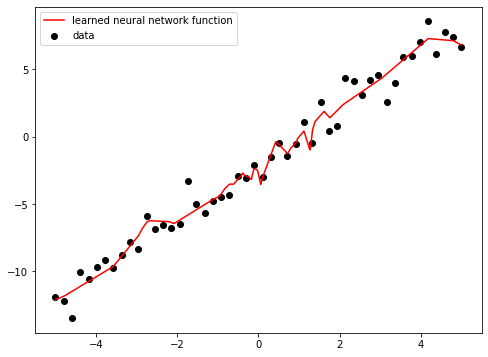

In [ ]:
# test x-values
x_test = np.linspace(-5, 5, 1000).reshape((1, -1))

# predict on the test x-values
y_test_pred = nn.forward(nn.weights, x_test)

# visualize the function learned by the neural networkmatthieu_meeus@g.harvard.edu
plt.figure(figsize = (8,6))
plt.scatter(x_train.flatten(), y_train.flatten(), color='black', label='data')
plt.plot(x_test.flatten(), y_test_pred.flatten(), color='red', label='learned neural network function')
plt.legend(loc='best')
plt.show()

**Discuss:** What do you observe? 

Text(0.5, 1.0, 'Training data for simple function')

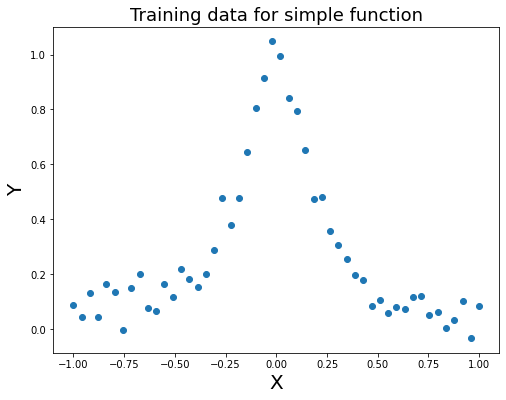

In [ ]:
# toy data 1: true relationship is more complex!
def complex_func(x):
  return 1./(1 + 25*x**2)

# remember this one?
x_train = np.linspace(-1, 1, 50)
y_train = complex_func(x_train) + np.random.normal(loc = 0.0, scale = 0.05, size = len(x_train))

plt.figure(figsize = (8,6))
plt.scatter(x_train, y_train)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.title('Training data for simple function', fontsize = 18)

The coefficient is:  [-0.02492478]
The intercept is :  0.2727720152522217


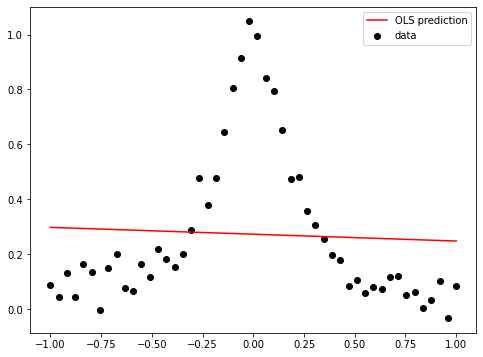

In [ ]:
# apply linear regression
reg = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
print('The coefficient is: ', reg.coef_)
print('The intercept is : ', reg.intercept_)
x_test = np.linspace(-1, 1, 100)
y_test_pred = reg.predict(x_test.reshape(-1, 1))

# visualize Ordinary least squares prediction
plt.figure(figsize = (8,6))
plt.scatter(x_train.flatten(), y_train.flatten(), color='black', label='data')
plt.plot(x_test.flatten(), y_test_pred.flatten(), color='red', label='OLS prediction')
plt.legend(loc='best')
plt.show()

In [ ]:
### neural network model design choices
width = 16
hidden_layers = 3
input_dim = 1
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

# instantiate a Feedforward neural network object
nn = Feedforward(architecture, random=random)

### define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':5000, 
          'random_restarts':1}

# fit my neural network to minimize MSE on the given data
nn.fit(x_train.reshape(1,-1), y_train.reshape(1,-1), params)

Iteration 0 lower bound 20889.740012011636; gradient mag: 63556.946914976346
Iteration 100 lower bound 551.1712254953941; gradient mag: 3879.1932480058413
Iteration 200 lower bound 49.42485667933444; gradient mag: 946.2110885311686
Iteration 300 lower bound 9.678038266140573; gradient mag: 211.61949270398648
Iteration 400 lower bound 5.217130544686837; gradient mag: 80.36522496545253
Iteration 500 lower bound 3.5952400309957024; gradient mag: 46.31168105761274
Iteration 600 lower bound 2.875993672922056; gradient mag: 38.152089049207476
Iteration 700 lower bound 2.4416943150061163; gradient mag: 25.41338230393445
Iteration 800 lower bound 2.174849753284803; gradient mag: 21.498988681988823
Iteration 900 lower bound 1.9554953124656769; gradient mag: 19.639275696062704
Iteration 1000 lower bound 1.7873632832750868; gradient mag: 16.88866618445068
Iteration 1100 lower bound 1.6654000298990908; gradient mag: 14.436625348676477
Iteration 1200 lower bound 1.5737905444345524; gradient mag: 12

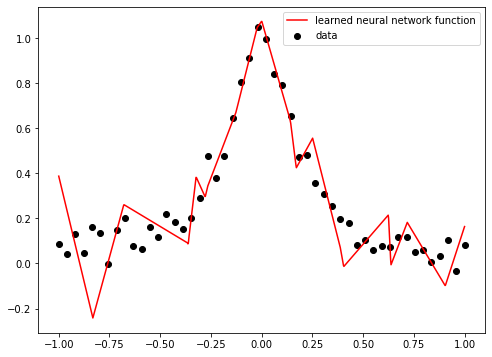

In [ ]:
# test x-values
x_test = np.linspace(-1, 1, 1000).reshape((1, -1))

# predict on the test x-values
y_test_pred = nn.forward(nn.weights, x_test)

# visualize the function learned by the neural network
plt.figure(figsize = (8,6))
plt.scatter(x_train.flatten(), y_train.flatten(), color='black', label='data')
plt.plot(x_test.flatten(), y_test_pred.flatten(), color='red', label='learned neural network function')
plt.legend(loc='best')
plt.show()

**Discuss:** What do we learn? Should we now always use Neural Networks?

## 3. ODE / PDE solvers vs NN

NeuroDiffEq

For the rest of the demo, we'll be interacting with the package NeuroDiffEq. You can find detailed documentation here (https://neurodiffeq.readthedocs.io/en/latest/) and their Github here (https://github.com/odegym/neurodiffeq). This is a library built upon Pytorch that enables users to solve ODEs and PDEs with neural networks. The cool thing is that it has been developed at IACS and is actively used (and extended) for ongoing research. 

In [ ]:
pip install neurodiffeq 

In [ ]:
from neurodiffeq import diff      # the differentiation operation
from neurodiffeq.ode import solve # the ANN-based solver
from neurodiffeq.ode import IVP   # the initial condition

Let's try to solve a very easy ODE:

$$\frac{d x}{d t} + x = 0$$

with as initial condition $x(0) = 1$. We all know that the exact solution is:

$$x(t) = e^{-t}$$

Let's see if the NN is able to find this!

In [ ]:
exponential = lambda x, t: diff(x, t) + x # specify the ODE
init_val_ex = IVP(t_0=0.0, x_0=1.0)       # specify the initial conditon

# solve the ODE
solution_ex, loss_ex = solve(
    ode=exponential, condition=init_val_ex, t_min=0.0, t_max=2.0
)

/usr/local/lib/python3.7/dist-packages/neurodiffeq/_version_utils.py:43: FutureWarning: The argument `x_0` is deprecated; use `u_0` instead for __init__.
  warnings.warn(f'The argument `{alias}` is deprecated; use `{new}` instead for {func_name}.', FutureWarning)
/usr/local/lib/python3.7/dist-packages/neurodiffeq/ode.py:262: FutureWarning: The `solve_system` function is deprecated, use a `neurodiffeq.solvers.Solver1D` instance instead
  FutureWarning,
Training Progress: 100%|██████████| 1000/1000 [00:04<00:00, 207.02it/s]


/usr/local/lib/python3.7/dist-packages/neurodiffeq/_version_utils.py:43: FutureWarning: The argument `as_type` is deprecated; use `to_numpy` instead for __call__.
  warnings.warn(f'The argument `{alias}` is deprecated; use `{new}` instead for {func_name}.', FutureWarning)


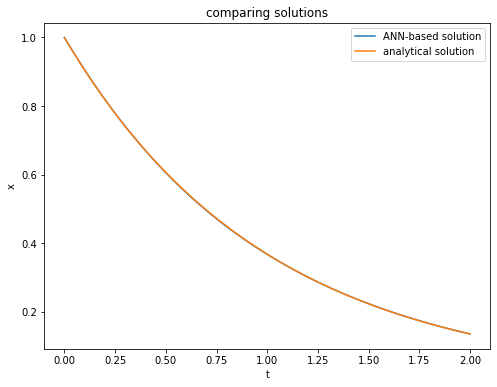

In [ ]:
ts = np.linspace(0, 2.0, 100)
x_net = solution_ex(ts, as_type='np')
x_ana = np.exp(-ts)

plt.figure(figsize = (8,6))
plt.plot(ts, x_net, label='ANN-based solution')
plt.plot(ts, x_ana, label='analytical solution')
plt.ylabel('x')
plt.xlabel('t')
plt.title('comparing solutions')
plt.legend()
plt.show()

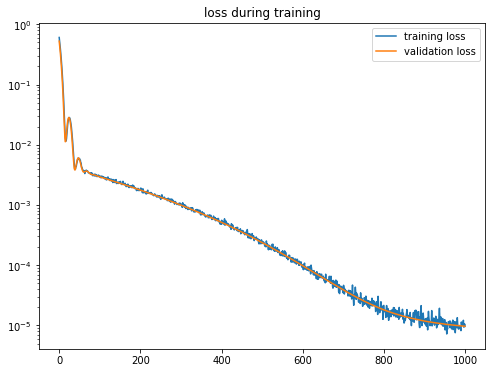

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(loss_ex['train_loss'], label='training loss')
plt.plot(loss_ex['valid_loss'], label='validation loss')
plt.yscale('log')
plt.title('loss during training')
plt.legend()
plt.show()

Let's try a PDE!

Very simple heat equation:

\begin{equation}
    \frac{\partial u}{\partial t} (t,x) = k\frac{\partial^2 u}{\partial x^2}
\end{equation}

X is defined in the range $[0,2]$ and with initial conditions and boundary conditions:

\begin{equation}
    u(x, t=0) = sin(\pi x/L)
\end{equation}
\begin{equation}
    \frac{\partial u}{\partial x}(x = 0, t) = \frac{\pi}{2} e^{\frac{-k\pi^2t}{L^2}}
\end{equation}
\begin{equation}
    \frac{\partial u}{\partial x}(x = L, t) = -\frac{\pi}{2} e^{\frac{-k\pi^2t}{L^2}}
\end{equation}


In [ ]:
from neurodiffeq.pde import IBVP1D, DirichletBVP2D, solve2D, ExampleGenerator2D, Monitor2D
from neurodiffeq.networks import FCNN
import torch

In [ ]:
from mpl_toolkits.mplot3d  import Axes3D
def plt_surf(xx, yy, zz, z_label='u', x_label='x', y_label='y', title=''):
    fig  = plt.figure(figsize=(8, 6))
    ax   = Axes3D(fig)
    surf = ax.plot_surface(xx, yy, zz, rstride=2, cstride=1, alpha=0.8, cmap='hot')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    ax.set_title(title)
    ax.set_proj_type('ortho')
    plt.show()

In [ ]:
k, L, T = 0.3, 2, 3
heat = lambda u, x, t: diff(u, t) - k * diff(u, x, order=2)

ibvp = IBVP1D(
    t_min=0, t_min_val=lambda x: torch.sin(np.pi * x / L),
    x_min=0, x_min_prime=lambda t:  np.pi/L * torch.exp(-k*np.pi**2*t/L**2),
    x_max=L, x_max_prime=lambda t: -np.pi/L * torch.exp(-k*np.pi**2*t/L**2)
)
net = FCNN(n_input_units=2, n_hidden_units=32, n_hidden_layers=1)

solution_neural_net_heat, loss = solve2D(
    pde=heat, condition=ibvp, xy_min=(0, 0), xy_max=(L, T),
    net=net, max_epochs=200, train_generator=ExampleGenerator2D(
        (32, 32), (0, 0), (L, T), method='equally-spaced-noisy'
    )
)

/usr/local/lib/python3.7/dist-packages/neurodiffeq/networks.py:46: FutureWarning: `n_hidden_units` and `n_hidden_layers` are deprecated, pass `hidden_units=(32, 32)` instead
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/neurodiffeq/_version_utils.py:14: FutureWarning: This class name is deprecated, use <class 'neurodiffeq.generators.Generator2D'> instead
  warnings.warn(f"This class name is deprecated, use {new_class} instead", FutureWarning)
/usr/local/lib/python3.7/dist-packages/neurodiffeq/pde.py:287: FutureWarning: The `solve2D_system` function is deprecated, use a `neurodiffeq.solvers.Solver2D` instance instead
  FutureWarning,
Training Progress: 100%|██████████| 200/200 [00:15<00:00, 12.85it/s]


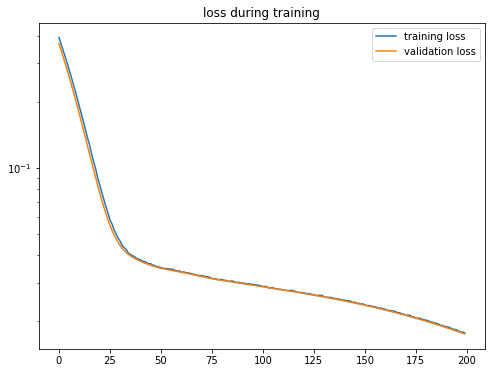

In [ ]:
# plot the loss

plt.figure(figsize = (8,6))
plt.plot(loss['train_loss'], label='training loss')
plt.plot(loss['valid_loss'], label='validation loss')
plt.yscale('log')
plt.title('loss during training')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/neurodiffeq/_version_utils.py:43: FutureWarning: The argument `as_type` is deprecated; use `to_numpy` instead for __call__.
  warnings.warn(f'The argument `{alias}` is deprecated; use `{new}` instead for {func_name}.', FutureWarning)


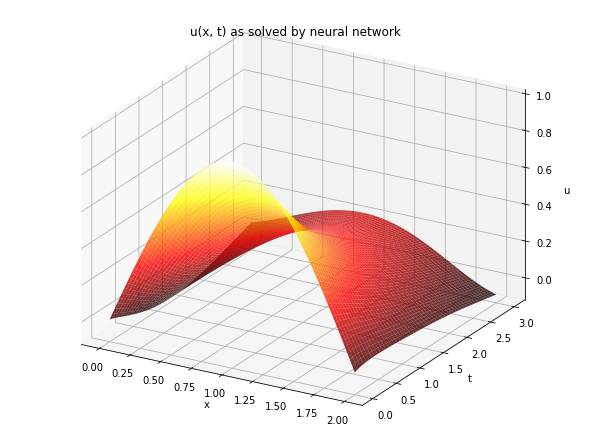

In [ ]:
xs, ts = np.linspace(0, L, 101), np.linspace(0, T, 101)
xx, tt = np.meshgrid(xs, ts)
sol_net = solution_neural_net_heat(xx, tt, as_type='np')
plt_surf(xx, tt, sol_net, y_label = 't', title='u(x, t) as solved by neural network')

## Exercise 3: Solve a specific ODE from HW3 [Take-home]

Recall problem 5 from HW3. We solved the following second-order ODE:

$$y''(t) + 2y'(t) + 17y(t) = 0$$

With $y(0) = 1$ and $y'(0) = 0$. Solve this equation between for $t = 0...3$ using the NeuroDiffEq package. You might need to look into some of the documentation, but should not be hard!

You can play around with quite some parameters. For instance, observe how some of the paramaters are tuned in the examples above (like architecture of the network), look under 'Advanced uses' of the documentation and tune the optimizer, adjust the number of trainign points, etc. 

Compare it to the analytical solution:

$$y(t) = e^{-t}(cos(4t) + \frac{1}{4}sin(4t))$$

In [ ]:
# you may need to use this package
from torch.optim import Adamax

In [ ]:
# write your code here

In [ ]:
# plot your results

In [ ]:
# plot the training loss and validation loss

In [ ]:
# write a short discussion on how NN compares to conventional numerical solvers